<a href="https://colab.research.google.com/github/pndang/NiemaLab/blob/master/data-url-query-and-viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Viral epidemics and genomics data science | Niema Lab**

In [ ]:
#  Name: Phu Dang
#  Date: 10.10.2022

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
sns.set_theme(style="whitegrid")
import random
import requests

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Test conversion from API endpoint URL to pandas dataframe

# url = 'https://api.outbreak.info/covid19/query?q=population:151391'
# url = 'https://api.outbreak.info/covid19/query?q=admin_level:2'
url = 'https://api.outbreak.info/covid19/query?'

In [ ]:
r = requests.get(url)

In [ ]:
r

<Response [200]>

In [ ]:
json = r.json()

In [ ]:
# json

In [ ]:
json.keys()

dict_keys(['took', 'total', 'max_score', 'hits'])

In [ ]:
# json['hits']

In [ ]:
type(json['hits'][0])

dict

In [ ]:
test_df = pd.DataFrame(json['hits'])

In [ ]:
test_df.columns

Index(['CBSA', 'FIPS', 'ID', 'State', '_id', '_score', 'admin1', 'admin2',
       'admin_level', 'confirmed', 'confirmed_doublingRate',
       'confirmed_numIncrease', 'confirmed_numIncrease_per_100k',
       'confirmed_pctIncrease', 'confirmed_per_100k',
       'confirmed_per_100k_breaks', 'confirmed_rolling',
       'confirmed_rolling_14days_ago', 'confirmed_rolling_14days_ago_diff',
       'confirmed_rolling_14days_ago_diff_breaks',
       'confirmed_rolling_14days_ago_diff_per_100k',
       'confirmed_rolling_14days_ago_diff_per_100k_breaks',
       'confirmed_rolling_14days_ago_per_100k', 'confirmed_rolling_breaks',
       'confirmed_rolling_per_100k', 'confirmed_rolling_per_100k_breaks',
       'country_name', 'date', 'dead', 'dead_doublingRate', 'dead_numIncrease',
       'dead_numIncrease_per_100k', 'dead_pctIncrease', 'dead_per_100k',
       'dead_per_100k_breaks', 'dead_rolling', 'dead_rolling_14days_ago',
       'dead_rolling_14days_ago_diff', 'dead_rolling_14days_ago_diff_b

In [ ]:
test_df

,CBSA,FIPS,ID,State,_id,_score,admin1,admin2,admin_level,confirmed,...,geometry,iso3,lat,location_id,long,mostRecent,name,num_subnational,population,wb_region
0,None,37003,USA_NorthCarolina_Alexander,None,USA_NorthCarolina_Alexander2021-12-16,1.0,North Carolina,Alexander,2,7022,...,"{'coordinates': [[[-81.328324, 35.996583], [-8...",USA,35.922380,USA_US-NC_37003,-81.177519,False,Alexander,0,37497,North America
1,None,37003,USA_NorthCarolina_Alexander,None,USA_NorthCarolina_Alexander2021-12-18,1.0,North Carolina,Alexander,2,7038,...,"{'coordinates': [[[-81.328324, 35.996583], [-8...",USA,35.922380,USA_US-NC_37003,-81.177519,False,Alexander,0,37497,North America
2,None,37087,USA_NorthCarolina_Haywood,None,USA_NorthCarolina_Haywood2020-09-28,1.0,North Carolina,Haywood,2,616,...,"{'coordinates': [[[-83.2561415523, 35.71512406...",USA,35.552691,USA_US-NC_37087,-82.981965,False,Haywood,0,62317,North America
3,None,37087,USA_NorthCarolina_Haywood,None,USA_NorthCarolina_Haywood2020-10-02,1.0,North Carolina,Haywood,2,626,...,"{'coordinates': [[[-83.2561415523, 35.71512406...",USA,35.552691,USA_US-NC_37087,-82.981965,False,Haywood,0,62317,North America
4,None,37077,USA_NorthCarolina_Granville,None,USA_NorthCarolina_Granville2021-07-12,1.0,North Carolina,Granville,2,6010,...,"{'coordinates': [[[-78.802335, 36.235794], [-7...",USA,36.303375,USA_US-NC_37077,-78.651842,False,Granville,0,60443,North America
5,None,37087,USA_NorthCarolina_Haywood,None,USA_NorthCarolina_Haywood2020-10-08,1.0,North Carolina,Haywood,2,638,...,"{'coordinates': [[[-83.2561415523, 35.71512406...",USA,35.552691,USA_US-NC_37087,-82.981965,False,Haywood,0,62317,North America
6,None,37077,USA_NorthCarolina_Granville,None,USA_NorthCarolina_Granville2021-07-16,1.0,North Carolina,Granville,2,6018,...,"{'coordinates': [[[-78.802335, 36.235794], [-7...",USA,36.303375,USA_US-NC_37077,-78.651842,False,Granville,0,60443,North America
7,None,37077,USA_NorthCarolina_Granville,None,USA_NorthCarolina_Granville2021-07-17,1.0,North Carolina,Granville,2,6018,...,"{'coordinates': [[[-78.802335, 36.235794], [-7...",USA,36.303375,USA_US-NC_37077,-78.651842,False,Granville,0,60443,North America
8,None,37077,USA_NorthCarolina_Granville,None,USA_NorthCarolina_Granville2021-07-18,1.0,North Carolina,Granville,2,6018,...,"{'coordinates': [[[-78.802335, 36.235794], [-7...",USA,36.303375,USA_US-NC_37077,-78.651842,False,Granville,0,60443,North America
9,None,37003,USA_NorthCarolina_Alexander,None,USA_NorthCarolina_Alexander2022-01-07,1.0,North Carolina,Alexander,2,7666,...,"{'coordinates': [[[-81.328324, 35.996583], [-8...",USA,35.922380,USA_US-NC_37003,-81.177519,False,Alexander,0,37497,North America


In [ ]:
# Importing dataset

df = pd.read_csv("/content/drive/MyDrive/NIEMA_Lab/countrySubmissionCount.csv")
df.head()

,Country,Total #Omicron GRA (B.1.1.529+BA.*),#Omicron GRA (B.1.1.529+BA.*) in past 4 weeks,%Omicron GRA (B.1.1.529+BA.*) in past 4 weeks
0,USA,"1,793,992","27,577",98.8%
1,United Kingdom,"1,309,099","7,864",100.0%
2,Germany,"445,354","5,884",99.5%
3,Denmark,"300,647","9,982",100.0%
4,France,"279,043","2,692",99.5%


In [ ]:
# Cleaning dataset

df.dtypes
remove_commas = lambda x : x.replace(',', '')
df["Total #Omicron GRA"] = df["Total #Omicron GRA (B.1.1.529+BA.*)"].apply(remove_commas)
df["#Omicron GRA in past 4 weeks"] = df["#Omicron GRA (B.1.1.529+BA.*) in past 4 weeks"].apply(remove_commas)
omicron = df.drop(columns={'Total #Omicron GRA (B.1.1.529+BA.*)', '#Omicron GRA (B.1.1.529+BA.*) in past 4 weeks'})
omicron = omicron.astype({col: 'float' for col in omicron.columns[2:]})
omicron = omicron[~(omicron == 0).any(axis=1)] # Drop rows with value 0
omicron.dtypes
omicron.head()

,Country,%Omicron GRA (B.1.1.529+BA.*) in past 4 weeks,Total #Omicron GRA,#Omicron GRA in past 4 weeks
0,USA,98.8%,1793992.0,27577.0
1,United Kingdom,100.0%,1309099.0,7864.0
2,Germany,99.5%,445354.0,5884.0
3,Denmark,100.0%,300647.0,9982.0
4,France,99.5%,279043.0,2692.0


In [ ]:
omicron.tail(15)

,Country,%Omicron GRA (B.1.1.529+BA.*) in past 4 weeks,Total #Omicron GRA,#Omicron GRA in past 4 weeks
64,Trinidad and Tobago,100.0%,1790.0,84.0
66,Bangladesh,100.0%,1778.0,27.0
68,Iceland,100.0%,1601.0,185.0
70,Cambodia,100.0%,1533.0,49.0
76,Martinique,100.0%,1207.0,3.0
77,Liechtenstein,100.0%,1163.0,55.0
80,Nepal,100.0%,1084.0,1.0
82,Curacao,100.0%,969.0,3.0
85,Bonaire,100.0%,847.0,12.0
86,Morocco,100.0%,825.0,4.0


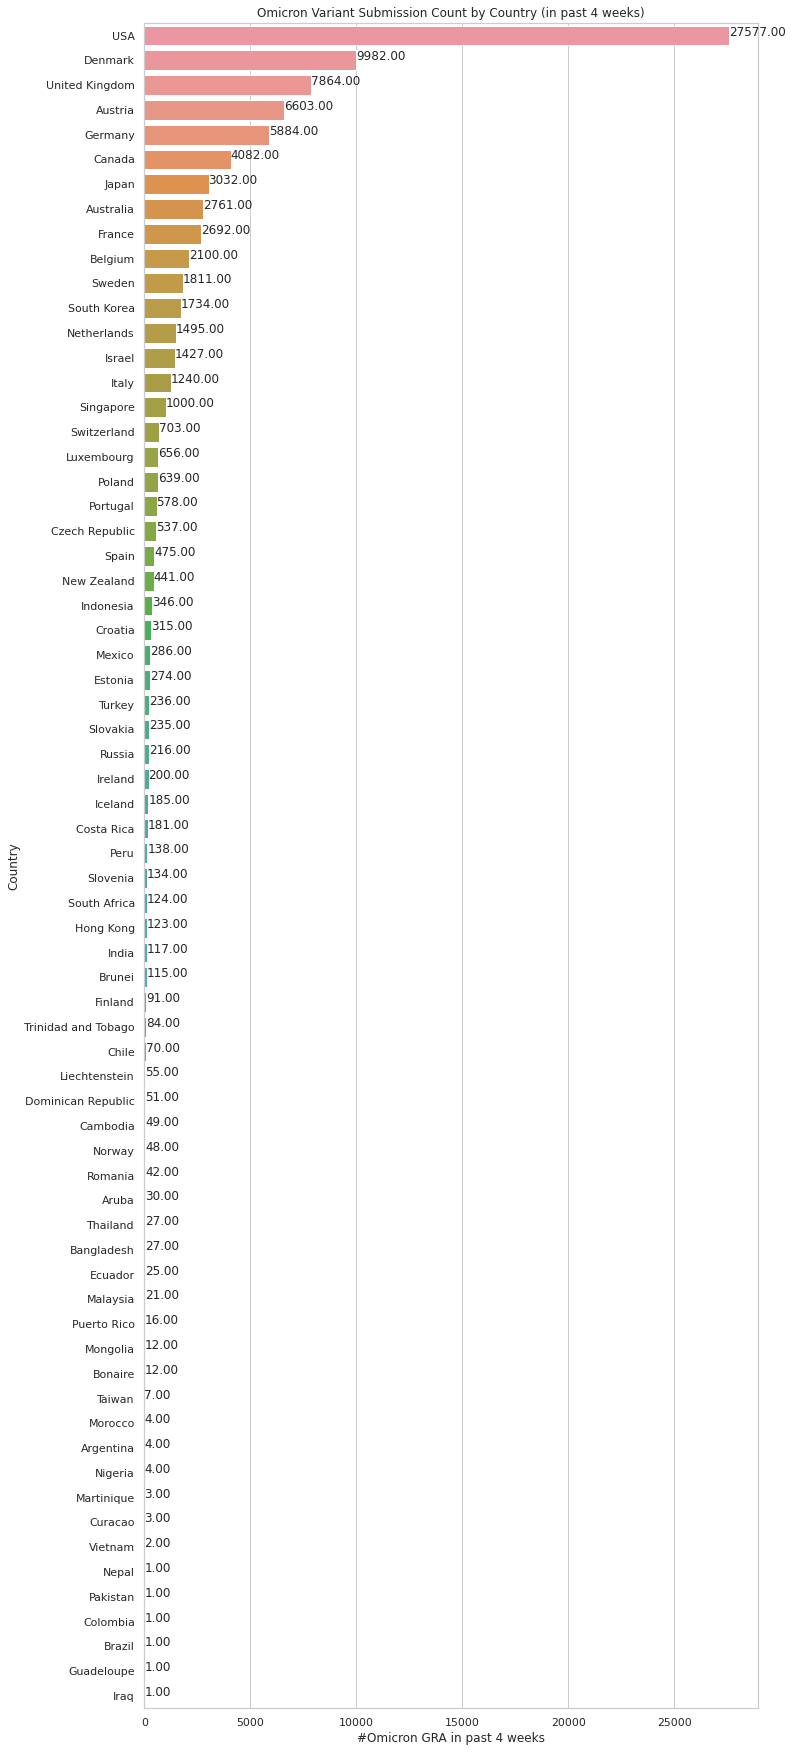

In [ ]:
# Graphing Omicron variant submission count in past 4 weeks by country

omicron.sort_values(by=['#Omicron GRA in past 4 weeks'], ascending=False, inplace=True)
plt.figure(figsize=(11, 31))
ax = sns.barplot(data=omicron, x='#Omicron GRA in past 4 weeks', y='Country');

# Label axis values
for bar in ax.patches:
    x = bar.get_x() + bar.get_width()
    y = bar.get_y() + bar.get_height() - (bar.get_height()*0.5)
    value = '{:.2f}'.format(bar.get_width())
    ax.text(x, y, value, ha="left")

plt.title('Omicron Variant Submission Count by Country (in past 4 weeks)');


COVID-19 variants time series analysis

Data source: https://data.chhs.ca.gov/dataset/covid-19-variant-data/resource/d7f9acfa-b113-4cbc-9abc-91e707efc08a

In [ ]:
# Importing the COVID-19 variants dataset and preview

variants = pd.read_csv("/content/drive/MyDrive/NIEMA_Lab/covid19variants.csv")
variants

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,2021-01-01,California,State,Lambda,0.0,0.00,NaN,NaN
1,2021-01-01,California,State,Total,59.0,100.00,NaN,NaN
2,2021-01-01,California,State,Beta,0.0,0.00,NaN,NaN
3,2021-01-01,California,State,Delta,0.0,0.00,NaN,NaN
4,2021-01-01,California,State,Other,29.0,49.15,NaN,NaN
...,...,...,...,...,...,...,...,...
6305,2022-09-23,California,State,Alpha,0.0,0.00,0.000000,0.000000
6306,2022-09-23,California,State,Omicron,85.0,100.00,168.428571,99.915254
6307,2022-09-23,California,State,Mu,0.0,0.00,0.000000,0.000000
6308,2022-09-23,California,State,Delta,0.0,0.00,0.142857,0.084746


In [ ]:
# Inspecting, cleaning, querying variants dataset

variants.get('variant_name').unique()
variants.get('date')


# Add month column
month = []
for date in variants.get('date'):
  one_month = date[5:7]
  month.append(one_month)
  
variants['month'] = month

variants.get('variant_name').unique()
variants.get('date')

# Query rows containing 2021 data
CoV2_variants_21 = variants[variants['date'].str.contains('2021')]
CoV2_variants_21['date_time'] = pd.to_datetime(CoV2_variants_21['date'])
CoV2_variants_21

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg,month,date_time
0,2021-01-01,California,State,Lambda,0.0,0.00,NaN,NaN,01,2021-01-01
1,2021-01-01,California,State,Total,59.0,100.00,NaN,NaN,01,2021-01-01
2,2021-01-01,California,State,Beta,0.0,0.00,NaN,NaN,01,2021-01-01
3,2021-01-01,California,State,Delta,0.0,0.00,NaN,NaN,01,2021-01-01
4,2021-01-01,California,State,Other,29.0,49.15,NaN,NaN,01,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
3645,2021-12-31,California,State,Mu,0.0,0.00,0.000000,0.000000,12,2021-12-31
3646,2021-12-31,California,State,Other,1.0,0.08,14.142857,0.609531,12,2021-12-31
3647,2021-12-31,California,State,Delta,58.0,4.48,166.714286,7.185076,12,2021-12-31
3648,2021-12-31,California,State,Epsilon,0.0,0.00,0.000000,0.000000,12,2021-12-31


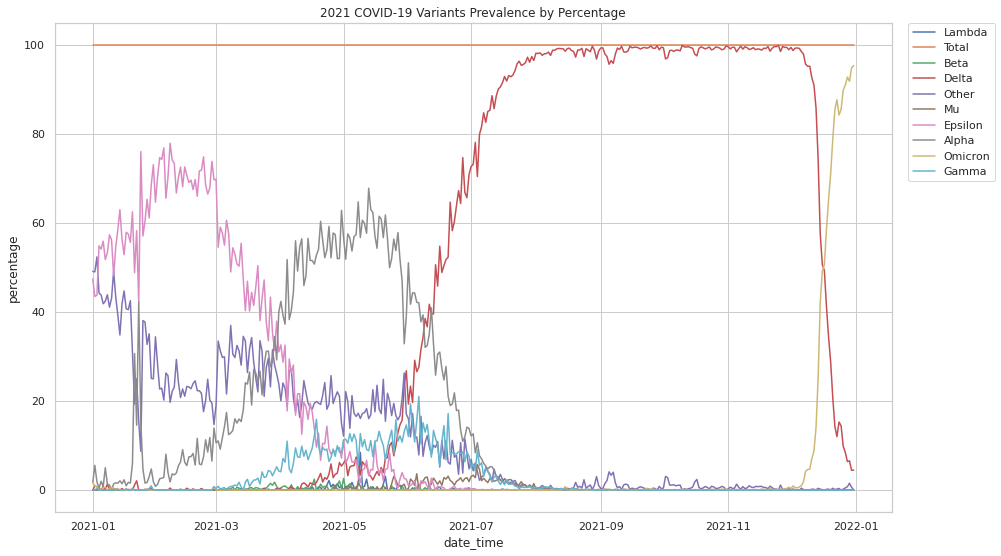

In [ ]:
# Plot the distribution of COVID-19 variants

plt.figure(figsize=(15, 9))
fig = sns.lineplot(data=CoV2_variants_21, x="date_time", y='percentage', hue="variant_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("2021 COVID-19 Variants Prevalence by Percentage")
plt.show()


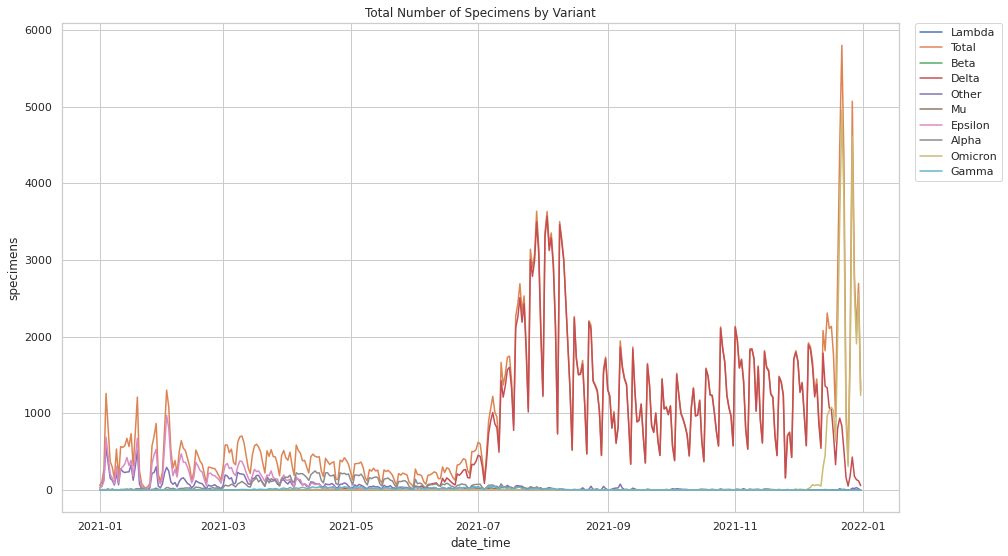

In [ ]:
# Plot total number of specimens that resulted in the specified variant by whole genome sequencing (2021)

plt.figure(figsize=(15, 9))
fig = sns.lineplot(data=CoV2_variants_21, x="date_time", y='specimens', hue="variant_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Total Number of Specimens by Variant")
plt.show()



In [ ]:
# Calculating rolling averages 
# (average of 3 days before, after, and the current date) - to account for the 
# lack of data in the weekends and graphical fluctuations

CoV2_variants_21['rolling_avg'] = 0
for i in range(0, CoV2_variants_21.shape[0]):
  idx = i
  last_idx = CoV2_variants_21.shape[0]-1
  count = 0  # count number of values added (imaginary), to handle the first and last 3 rows
             # Idea: if index is 0, assume 3 "before" values already added, 
             #       if index is 1, assume 2 "before" values already added, 
             #       so on

  values_before = []
  while len(values_before) < 3 and count < 3:
    if i == 0:
      break
    count = 2 if idx == 1 else 1 if idx == 2 else 0
    values_before.append(CoV2_variants_21.iloc[idx-1][4])
    idx -= 1
    count += 1   
  
  idx, count = i, 0
  values_after = []
  while len(values_after) < 3 and count < 3:
    if i == last_idx:
      break
    count = 2 if idx == last_idx - 1 else 1 if i == last_idx - 2 else 0
    values_after.append(CoV2_variants_21.iloc[idx+1][4])
    idx += 1
    count += 1

  # Calculate the average
  average = np.mean(values_before + [CoV2_variants_21.iloc[i][4]] + values_after)
  CoV2_variants_21.at[i, 'rolling_avg'] = average


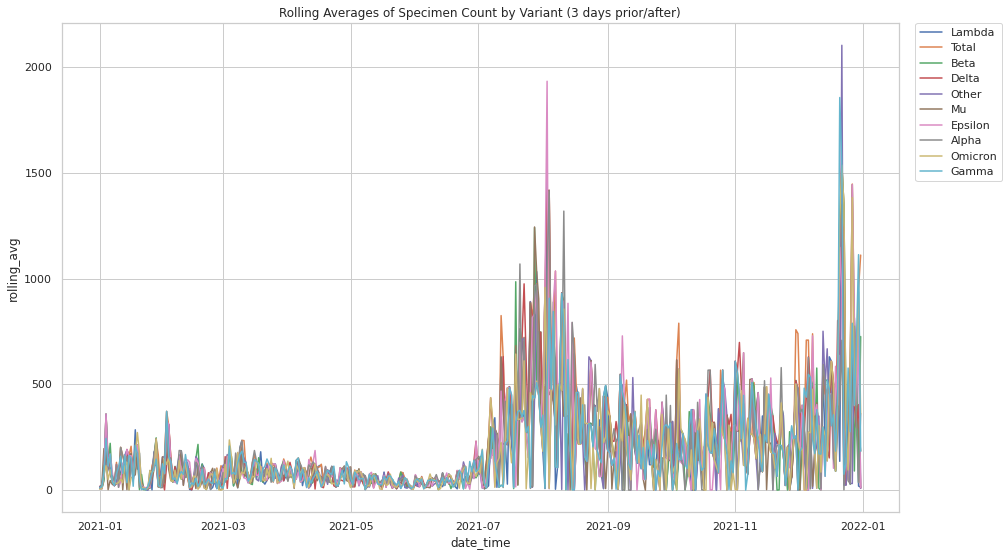

In [ ]:
# Plot the rolling averages of daily specimens count (2021)

plt.figure(figsize=(15, 9))
fig = sns.lineplot(data=CoV2_variants_21, x="date_time", y='rolling_avg', hue="variant_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Rolling Averages of Specimen Count by Variant (3 days prior/after)")
plt.show()

In [ ]:
# ^ recalculate rolling averages (wrongly done above) and re-plot the above plot

variant_names = CoV2_variants_21.get('variant_name').unique()

# Subset the variants dataset by variant
lambda_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Lambda'].reset_index()
beta_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Beta'].reset_index()
mu_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Mu'].reset_index()
epsilon_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Epsilon'].reset_index()
alpha_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Alpha'].reset_index()
omicron_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Omicron'].reset_index()
gamma_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Gamma'].reset_index()
delta_variant = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Delta'].reset_index()
total = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Total'].reset_index()
other = CoV2_variants_21[CoV2_variants_21['variant_name'] == 'Other'].reset_index()

subsets = [lambda_variant, total, beta_variant, delta_variant, other, mu_variant, epsilon_variant, 
           alpha_variant, omicron_variant, gamma_variant]


In [ ]:
CoV2_variants_21.get('variant_name').unique()

array(['Lambda', 'Total', 'Beta', 'Delta', 'Other', 'Mu', 'Epsilon',
       'Alpha', 'Omicron', 'Gamma'], dtype=object)

In [ ]:
beta_variant

,index,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg,month,date_time,rolling_avg
0,2,2021-01-01,California,State,Beta,0.0,0.0,NaN,NaN,01,2021-01-01,14
1,14,2021-01-02,California,State,Beta,0.0,0.0,NaN,NaN,01,2021-01-02,7
2,20,2021-01-03,California,State,Beta,0.0,0.0,NaN,NaN,01,2021-01-03,43
3,33,2021-01-04,California,State,Beta,0.0,0.0,NaN,NaN,01,2021-01-04,359
4,46,2021-01-05,California,State,Beta,0.0,0.0,NaN,NaN,01,2021-01-05,118
...,...,...,...,...,...,...,...,...,...,...,...,...
360,3601,2021-12-27,California,State,Beta,0.0,0.0,0.0,0.0,12,2021-12-27,690
361,3611,2021-12-28,California,State,Beta,0.0,0.0,0.0,0.0,12,2021-12-28,90
362,3621,2021-12-29,California,State,Beta,0.0,0.0,0.0,0.0,12,2021-12-29,698
363,3631,2021-12-30,California,State,Beta,0.0,0.0,0.0,0.0,12,2021-12-30,36


In [ ]:
# Function for calculating rolling averages

def calculate_rolling_avg(dataframe):
  dataframe['rolling_avg'] = 0
  for i in range(0, dataframe.shape[0]):
    idx = i
    last_idx = dataframe.shape[0]-1
    count = 0  # count number of values added (imaginary), to handle the first and last 3 rows
               # Idea: if index is 0, assume 3 "before" values already added, 
               #       if index is 1, assume 2 "before" values already added, 
               #       so on

    values_before = []
    while len(values_before) < 3 and count < 3:
      if i == 0:
        break
      count = 2 if idx == 1 else 1 if idx == 2 else 0
      values_before.append(dataframe.iloc[idx-1][5])
      idx -= 1
      count += 1   
    
    idx, count = i, 0
    values_after = []
    while len(values_after) < 3 and count < 3:
      if i == last_idx:
        break
      count = 2 if idx == last_idx-1 else 1 if i == last_idx-2 else 0
      values_after.append(dataframe.iloc[idx+1][5])
      idx += 1
      count += 1

    # Calculate the average
    average = np.mean(values_before + [dataframe.iloc[i][5]] + values_after)
    dataframe.at[i, 'rolling_avg'] = average

    # print(i)
    # print(values_before)
    # print(values_after)
    # print(values_before + [dataframe.iloc[i][4]] + values_after)
    # print(average)
    # print('***********')

  return None


In [ ]:
# Calculating rolling averages for each variant

for subset in subsets:
  calculate_rolling_avg(subset)
  subset.set_index('index', inplace=True)

# calculate_rolling_avg(epsilon_variant)

In [ ]:
epsilon_variant

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg,month,date_time,rolling_avg
index,,,,,,,,,,,
6,2021-01-01,California,State,Epsilon,28.0,47.46,NaN,NaN,01,2021-01-01,221
12,2021-01-02,California,State,Epsilon,47.0,43.52,NaN,NaN,01,2021-01-02,264
26,2021-01-03,California,State,Epsilon,117.0,43.82,NaN,NaN,01,2021-01-03,255
31,2021-01-04,California,State,Epsilon,692.0,54.92,NaN,NaN,01,2021-01-04,240
40,2021-01-05,California,State,Epsilon,440.0,54.19,NaN,NaN,01,2021-01-05,248
...,...,...,...,...,...,...,...,...,...,...,...
3606,2021-12-27,California,State,Epsilon,0.0,0.00,0.0,0.0,12,2021-12-27,0
3616,2021-12-28,California,State,Epsilon,0.0,0.00,0.0,0.0,12,2021-12-28,0
3620,2021-12-29,California,State,Epsilon,0.0,0.00,0.0,0.0,12,2021-12-29,0


date                          2021-02-05
area                          California
area_type                          State
variant_name                       Total
specimens                          285.0
percentage                         100.0
specimens_7d_avg              619.571429
percentage_7d_avg                  100.0
month                                 02
date_time            2021-02-05 00:00:00
rolling_avg                          614
Name: 358, dtype: object


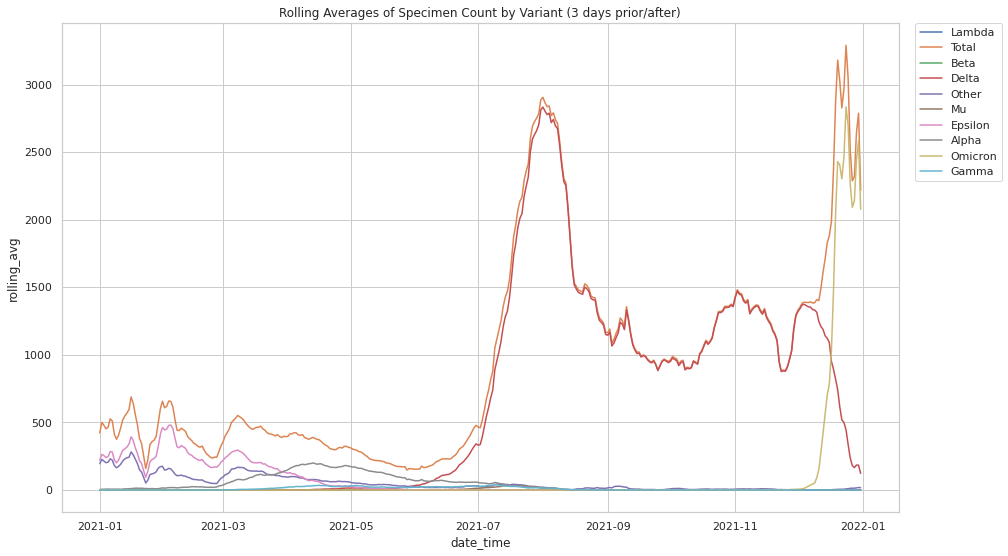

In [ ]:
# Plotting the rolling averages of daily specimens count (2021)

# wra ~ with rolling averages
variants_wra = pd.concat(subsets)
variants_wra = variants_wra.dropna(subset=['date'])

print(variants_wra.iloc[400])

plt.figure(figsize=(15, 9))
fig = sns.lineplot(data=variants_wra, x="date_time", y='rolling_avg', hue="variant_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Rolling Averages of Specimen Count by Variant (3 days prior/after)")
plt.show()

# Meeting notes
    # Specify legend by set a variant to a specific color, also we can do labels, widths
    # Action items for next week: define the colors for the legend, make code generic for future 
          # additional values (use keys (lineages) and values (dataframes)  in a dictionary, and a 
          # seaborn function to generate a random color palette)

    # Idea: automatically subsetting and plotting and calculating rolling averages

In [ ]:
# all possible value for color palettes
all_palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',          
                'GnBu', 'GnBu_r',  'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',  'PRGn', 'PRGn_r', 'Paired', 'Paired_r',                 
                'Pastel1', 'Pastel1_r', 'Pastel2',  'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',                 
                'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',                 
                'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr',                 
                'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',  'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',                
                'cividis', 'cividis_r', 'cool', 'cool_r',  'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',  'gist_earth',                
                'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',  'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',                
                'gist_stern_r', 'gist_yarg',  'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',  'hsv', 'hsv_r', 'icefire',               
                'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r',  'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink',                
                'pink_r',  'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r',  'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',               
                'summer_r', 'tab10', 'tab10_r','tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo',  'turbo_r', 'twilight',                
                'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',  'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
                

In [ ]:
color_palette = sns.color_palette('mako')
color_palette

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

# **Automate/generalize the above processes: subsetting, calcuting rolling averages, and plotting**

Start: 2021-01-01 00:00:00
End: 2021-12-31 00:00:00
Color palette: magma



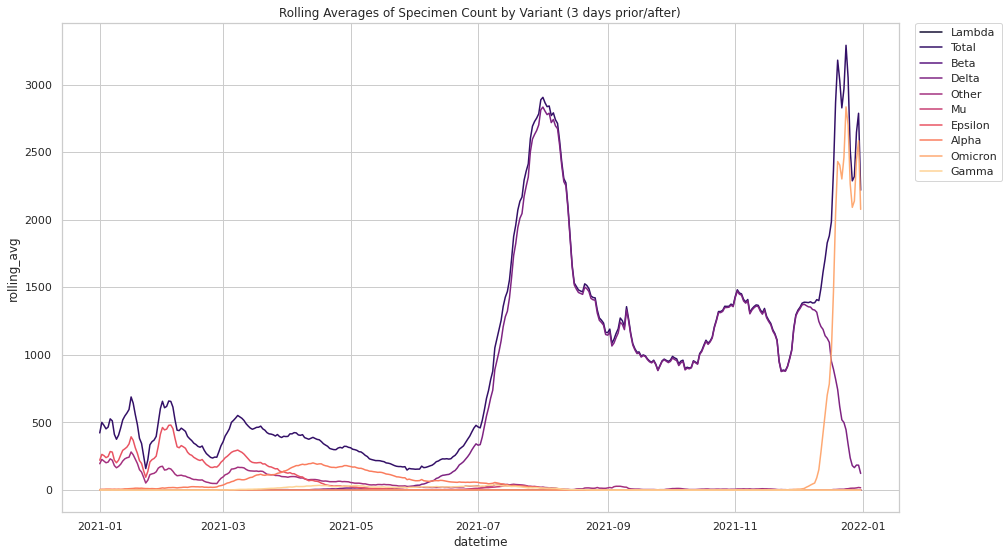

In [ ]:
# Importing dataset
data = pd.read_csv("/content/drive/MyDrive/NIEMA_Lab/covid19variants.csv")

# ******************************************************************************
# Change these variables to match analysis objectives and different datasets

start = datetime.datetime(2021, 1, 1) # starting date
end = datetime.datetime(2021, 12, 31) # ending date
variant_col = 'variant_name' # change for different datasets
date_col = 'date' # change for different datasets

# ******************************************************************************

# Check if time_col column is of type datetime, proceed if yes, convert to datetime if no
if data.get(date_col).dtypes == '<M8[ns]':
  pass
else:
  data['datetime'] = pd.to_datetime(data[date_col])
  date_col = 'datetime'

data = data[(data[date_col] >= start) & (data[date_col] <= end)]

variants = data.get(variant_col).unique()

# Creating a dictionary of variants (keys are variant names &
# values are subset dataframes of variants)
variants_dict = {var: data[data[variant_col] == var] for var in variants}

# Calculating rolling averages for each variant dataframes in dictionary 
for value in variants_dict.values():
  value.reset_index(inplace=True)
  calculate_rolling_avg(value) # calculate_rolling_avg function is defined above 
  value.set_index('index', inplace=True)

# Concatenating the dataframes into one for plotting, drop rows with N/A
variants_wra = pd.concat(variants_dict.values())
variants_wra = variants_wra.dropna(subset=[date_col])

# Plotting the rolling averages of daily specimens count by variant
plt.figure(figsize=(15, 9))

# Randomly choose a color palette
color_palette = random.choice(all_palettes)

# Displaying info about plot
print("Start: "+str(start))
print("End: "+str(end))
print("Color palette: "+color_palette)
print()

fig = sns.lineplot(
    data=variants_wra, 
    x=date_col, 
    y='rolling_avg', 
    hue=variant_col,
    palette=color_palette
    )

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Rolling Averages of Specimen Count by Variant (3 days prior/after)")
plt.show()


In [ ]:
# Next steps: users pick dates/colors from command line args, turn this into an applet?
# Make the applet as customizable as possible for users, as easy and intuitive as possible


In [ ]:
# Code testing cell

x = '12,200'
x = x.replace(',', '')
x = float(x)

# CoV2_variants_21.iloc[0][2] = 'state'
CoV2_variants_21.at[0, 'area_type'] = 'State'
CoV2_variants_21.tail(15)

x = [1,2,3]
y = [100, 200]
x+y

CoV2_variants_21
# test = variants[variants['variant_name'] == 'Omicron']
# test
# CoV2_variants_21.get('variant_name').unique()

# omicron_variant.get('date_time').dtypes == '<M8[ns]'

# color_palette = sns.color_palette(n_colors=len(variants))
# color_palette

print("Start: "+color_palette)

Start: spring_r


In [ ]:
# Unused Code Archive

    # palette="ch:rot=-.25,hue=1,light=.75"

    # fig.get_legend().legendHandles[5].get_color()
    # print(fig.get_legend().legendHandles[5])

    # # Setting legend colors
    # legend = fig.get_legend()
    # legend.legendHandles[0].set_color('blue')
    # legend.legendHandles[1].set_color('green')
    # print(legend.legendHandles[2])

